<a href="https://colab.research.google.com/github/Maxim687/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_5_1_%D0%A2%D0%B8%D0%BC%D0%BE%D1%89%D1%83%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Student_data.csv'
df = pd.read_csv(file_path)

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
print("Кількість пропущених значень у кожному стовпці:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

Кількість пропущених значень у кожному стовпці:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
df.shape

(2392, 15)

In [ ]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


In [ ]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)

Кількість дублікатів: 0


In [ ]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
target = 'GradeClass'
if df[target].dtype == 'object' or len(df[target].unique()) < 20:
    print("Задача класифікації")
else:
    print("Задача регресії")

Задача класифікації


In [ ]:
#Розділення даних на навчальну і тестову виібрки та масштабування даних
X = df.drop('GradeClass', axis = 1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state = 42)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

print("Найкращі параметри для випадкового лісу: ", grid_search_rf.best_params_)
print("Найкраща точність перехресної перевірки для випадкового лісу: ", grid_search_rf.best_score_)

y_pred_rf = grid_search_rf.predict(X_test)
print("Оцінка точності на тестовій вибірці: ", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Найкращі параметри для випадкового лісу:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Найкраща точність перехресної перевірки для випадкового лісу 0.9210640711932525
Оцінка точності на тестовій вибірці  0.9123173277661796


In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression(random_state = 42, max_iter = 1000)

grid_search_lr = GridSearchCV(estimator = lr, param_grid = param_grid_lr, cv = 5, n_jobs = -1, verbose = 2)
grid_search_lr.fit(X_train, y_train)

print("Найкращі параметри для логістичної регресії: ", grid_search_lr.best_params_)
print("Найкраща точність перехресної перевірки для логістичної регресії: ", grid_search_lr.best_score_)

y_pred_lr = grid_search_lr.predict(X_test)
print("Оцінка точності на тестовій вибірці: ", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Найкращі параметри для логістичної регресії {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Найкраща точність перехресної перевірки для логістичної регресії 0.7710333137396963
Оцінка точності на тестовій вибірці  0.7432150313152401


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm = SVC(random_state = 42)

grid_search_svm = GridSearchCV(estimator = svm, param_grid = param_grid_svm, cv = 5, n_jobs = -1, verbose = 2)
grid_search_svm.fit(X_train, y_train)

print("Найкращі параметри для SVM: ", grid_search_svm.best_params_)
print("Найкраща точність перехресної перевірки для SVM: ", grid_search_svm.best_score_)

y_pred_svm = grid_search_svm.predict(X_test)
print("Оцінка точності на тестовій вибірці: ", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Найкращі параметри для SVM:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Найкраща точність перехресної перевірки для SVM:  0.8557147348707502
Оцінка точності на тестовій вибірці:  0.824634655532359


# Оцінити моделі.

Випадковий ліс:
Точність перехресної перевірки: 0.9211.
Точність на тестовій вибірці: 0.9123.
Це найкраща модель за точністю як на крос-валідації, так і на тестовій вибірці.

Логістична регресія:
Точність перехресної перевірки: 0.7710.
Точність на тестовій вибірці: 0.7432.
Логістична регресія показує значно нижчу точність, що може свідчити про те, що дані не є лінійно роздільними або модель не враховує всі взаємозв'язки між змінними.

SVM:
Точність перехресної перевірки: 0.8557.
Точність на тестовій вибірці: 0.8246.
SVM показує середні результати, однак його точність все ще досить висока.

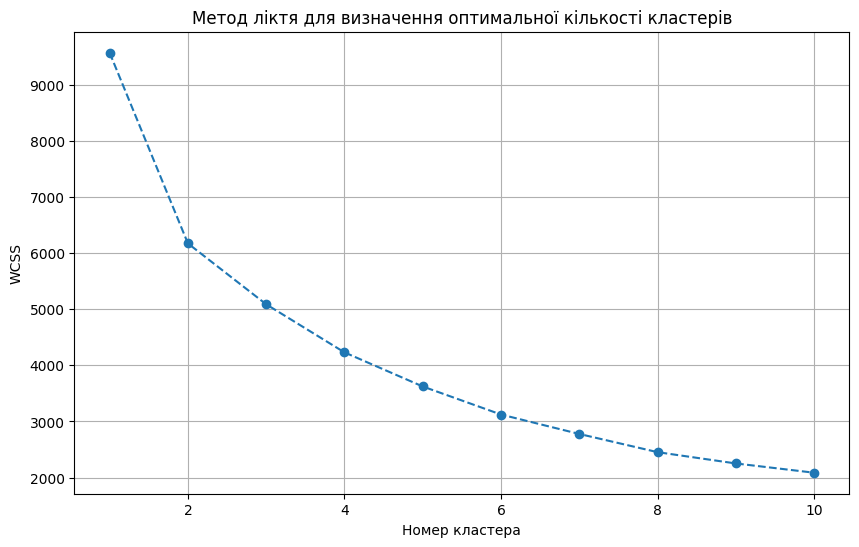

In [ ]:
# Визначити методом ліктя і силуєтів оптимальні кількість класетрів.

features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle='--')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Номери кластерів')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2.

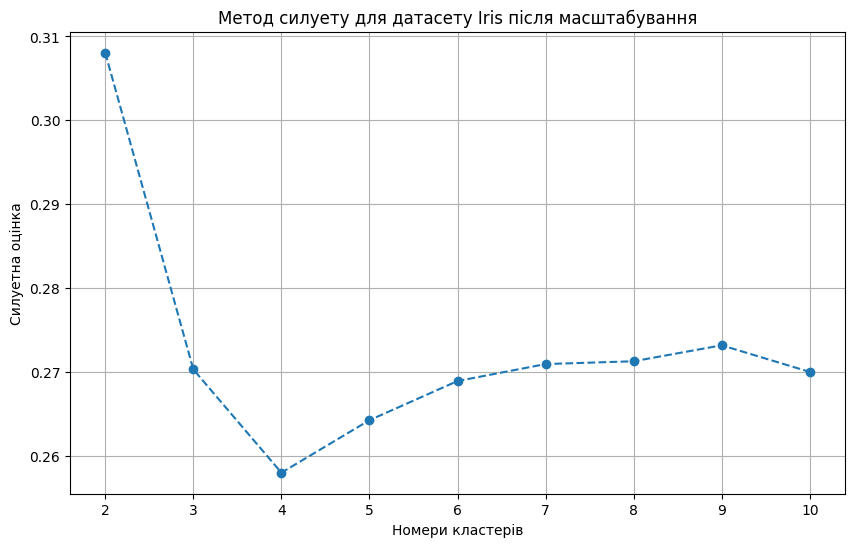

In [ ]:
silhouette_scores = []
for i in range (2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle = '--')
plt.title('Метод силуету для визначення оптимальної кількості кластерів')
plt.xlabel('Номери кластерів')
plt.ylabel('Силуетна оцінка')
plt.grid(True)
plt.show()

Оптимальна кількість кластерів - 2(там де максимум).

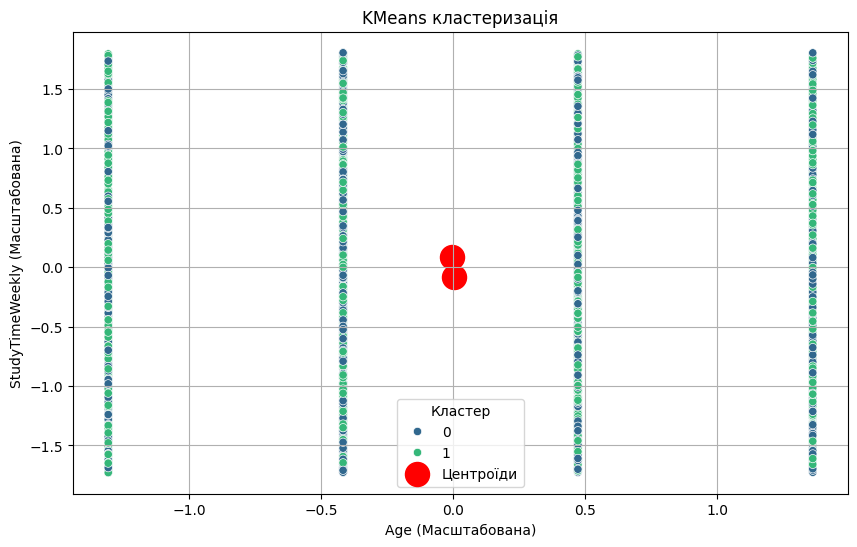

In [ ]:
#Візуалізація кластерів
import seaborn as sns
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Центроїди')
plt.title('KMeans кластеризація')
plt.xlabel('Age (Масштабована)')
plt.ylabel('StudyTimeWeekly (Масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

Висновок

У реальних даних можуть бути класи, які не мають чіткої або компактної структури, через що алгоритм KMeans не може правильно розділити їх на окремі кластери.Деякі класи можуть містити сильно різноманітні дані, що можуть бути розділені на кілька кластерів. В той час як інші класи можуть бути настільки компактними, що алгоритм знаходить менше кластерів, ніж класів.